# Simple Returns Part I

In [1]:
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [2]:
PG = wb.DataReader('PG', data_source='yahoo',start='1995-1-1')

In [3]:
PG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1995-01-03,15.62500,15.43750,15.46875,15.59375,3318400.0,7.875520
1995-01-04,15.65625,15.31250,15.53125,15.46875,2218800.0,7.812391
1995-01-05,15.43750,15.21875,15.37500,15.25000,2319600.0,7.701916
1995-01-06,15.40625,15.15625,15.15625,15.28125,3438000.0,7.717696
1995-01-09,15.40625,15.18750,15.34375,15.21875,1795200.0,7.686132


In [4]:
PG.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-08-10,146.500000,145.389999,145.889999,146.300003,4641300.0,146.300003
2022-08-11,147.289993,144.929993,146.809998,145.259995,5954300.0,145.259995
2022-08-12,146.729996,144.960007,145.910004,146.669998,5036600.0,146.669998
2022-08-15,148.770004,146.750000,146.869995,148.559998,6006200.0,148.559998
2022-08-16,150.589996,148.360001,148.360001,150.309998,4321463.0,150.309998


In [5]:
PG['simple_return'] = (PG['Adj Close']/PG['Adj Close'].shift(1)) - 1
print (PG['simple_return'])

Date
1995-01-03         NaN
1995-01-04   -0.008016
1995-01-05   -0.014141
1995-01-06    0.002049
1995-01-09   -0.004090
                ...   
2022-08-10    0.009453
2022-08-11   -0.007109
2022-08-12    0.009707
2022-08-15    0.012886
2022-08-16    0.011780
Name: simple_return, Length: 6955, dtype: float64


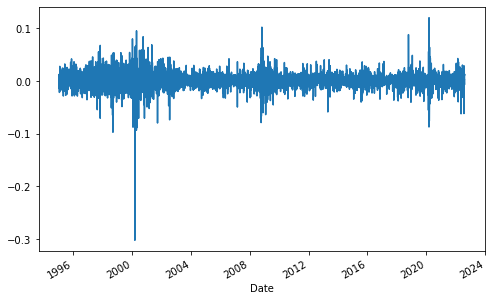

In [6]:
PG['simple_return'].plot(figsize=(8,5))
plt.show()

In [7]:
# pandas.DataFrame.mean() - calculates the
# average daily rate of return

avg_returns_d = PG['simple_return'].mean()
avg_returns_d


0.0005246086168600531

In [8]:
# there are 250 or 251 trading days
avg_returns_d = PG['simple_return'].mean() * 250
avg_returns_d


0.13115215421501328

In [9]:
print (str(round(avg_returns_d, 4)* 100) + '%')

13.120000000000001%


# Log Returns

$$
ln\frac{P_t}{P_{t-1}}
$$

In [10]:
## Numpy offers the possibility of vectorized computation

## Vectorization
## the ability to organize several kinds of data processing
## tasks as array expressions

## Vectorization <--------> array programming

## Vectors, Matrices, multi dimensional arrays

## Alternative -- writing tideous loops  -- this is time consuming
## Numpy is Pyhtons extension that allows to replace loops with 
## one dim or multi dim arrays --- this operation is vectorization


In [11]:
PG.head()

,High,Low,Open,Close,Volume,Adj Close,simple_return
Date,,,,,,,
1995-01-03,15.62500,15.43750,15.46875,15.59375,3318400.0,7.875520,NaN
1995-01-04,15.65625,15.31250,15.53125,15.46875,2218800.0,7.812391,-0.008016
1995-01-05,15.43750,15.21875,15.37500,15.25000,2319600.0,7.701916,-0.014141
1995-01-06,15.40625,15.15625,15.15625,15.28125,3438000.0,7.717696,0.002049
1995-01-09,15.40625,15.18750,15.34375,15.21875,1795200.0,7.686132,-0.004090


In [12]:
PG['log_return'] = np.log(PG['Adj Close']/PG['Adj Close'].shift(1))
print (PG['log_return'])

Date
1995-01-03         NaN
1995-01-04   -0.008048
1995-01-05   -0.014242
1995-01-06    0.002047
1995-01-09   -0.004098
                ...   
2022-08-10    0.009409
2022-08-11   -0.007134
2022-08-12    0.009660
2022-08-15    0.012804
2022-08-16    0.011711
Name: log_return, Length: 6955, dtype: float64


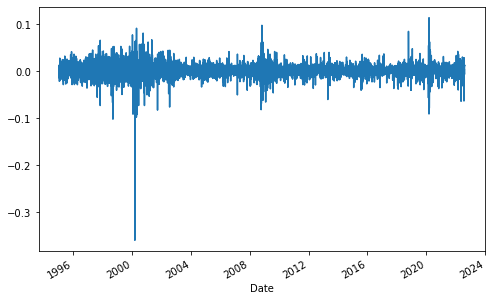

In [13]:
PG['log_return'].plot(figsize=(8, 5))
plt.show()

In [14]:
log_return_d = PG['log_return'].mean()
log_return_d


0.00042406393860384105

In [15]:
log_return_a = PG['log_return'].mean()*250
log_return_a


0.10601598465096027

In [16]:
print (str(round(log_return_a, 4)*100) + '%')

10.6%


# Calculating Rate of Returns of a Portfolio of Securities

In [17]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [74]:
tickers = ['RIVN', 'MSFT', 'F', 'TSLA']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='1995-1-1')['Adj Close']

In [75]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 193 entries, 2021-11-10 to 2022-08-17
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RIVN    193 non-null    float64
 1   MSFT    193 non-null    float64
 2   F       193 non-null    float64
 3   TSLA    193 non-null    float64
dtypes: float64(4)
memory usage: 7.5 KB


In [76]:
mydata.head()

,RIVN,MSFT,F,TSLA
Date,,,,
2021-11-10,100.730003,328.748871,18.849813,1067.949951
2021-11-11,122.989998,330.368744,19.034803,1063.510010
2021-11-12,129.949997,334.632172,18.986122,1033.420044
2021-11-15,149.360001,333.986206,19.336637,1013.390015
2021-11-16,172.009995,337.404877,19.268482,1054.729980


In [77]:
mydata.tail()

,RIVN,MSFT,F,TSLA
Date,,,,
2022-08-11,38.950001,287.019989,15.830000,859.890015
2022-08-12,38.900002,291.910004,16.180000,900.090027
2022-08-15,37.279999,293.470001,16.320000,927.960022
2022-08-16,38.230000,292.709991,16.430000,919.690002
2022-08-17,36.439999,291.125000,16.014999,909.599976


# Normalization to 100:

$$
\frac{P_t}{P_{t-1}}*100
$$

In [78]:
mydata.iloc[0]

RIVN     100.730003
MSFT     328.748871
F         18.849813
TSLA    1067.949951
Name: 2021-11-10 00:00:00, dtype: float64

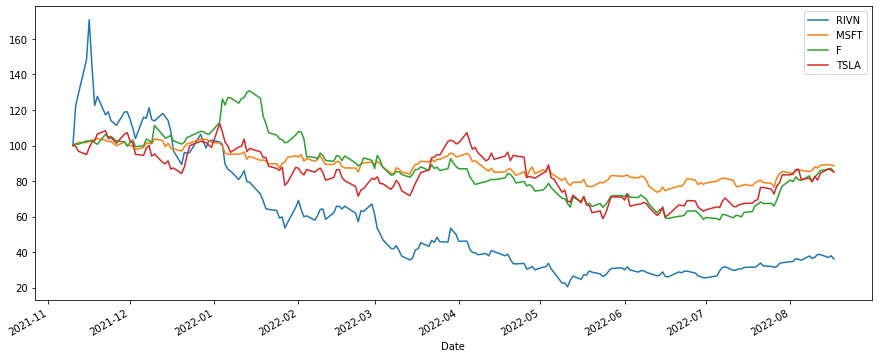

In [80]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15,6));
plt.show()

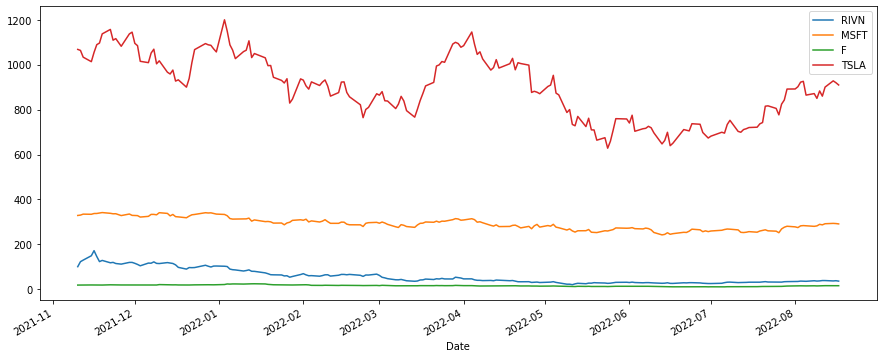

In [81]:
mydata.plot(figsize = (15,6))
plt.show()

In [61]:
mydata.loc['1995-01-03']

KeyError: '1995-01-03'

In [84]:
mydata.iloc[0]

RIVN     100.730003
MSFT     328.748871
F         18.849813
TSLA    1067.949951
Name: 2021-11-10 00:00:00, dtype: float64

# Simple Rate of Rate of Return of Portfolio

In [27]:
# np.dot() - calculates vector or matrix products
# the output: dot product

In [86]:
returns = (mydata / mydata.shift(1)) - 1
returns.head()

,RIVN,MSFT,F,TSLA
Date,,,,
2021-11-10,NaN,NaN,NaN,NaN
2021-11-11,0.220987,0.004927,0.009814,-0.004157
2021-11-12,0.056590,0.012905,-0.002557,-0.028293
2021-11-15,0.149365,-0.001930,0.018462,-0.019382
2021-11-16,0.151647,0.010236,-0.003525,0.040794


In [87]:
weights = np.array([0.25, 0.25, 0.25, 0.25])

In [88]:
np.dot(returns,weights)

array([        nan,  0.05789264,  0.00966111,  0.03662855,  0.049788  ,
       -0.02725879, -0.0393337 ,  0.01902822, -0.00437349, -0.01165482,
       -0.00806944, -0.02581691,  0.03401647, -0.00889868, -0.01466799,
       -0.00975043, -0.04391831,  0.03096233,  0.02562142,  0.01503123,
       -0.03342047,  0.0327932 , -0.01737822, -0.01854101,  0.00654211,
       -0.03119794, -0.03209772, -0.03593095,  0.03793758,  0.02876841,
        0.01818559,  0.0453598 , -0.01245838, -0.01099811,  0.00360253,
       -0.0010609 ,  0.04236003,  0.01118662, -0.05770922, -0.00634687,
       -0.01194446, -0.01229068,  0.01376684,  0.02243289, -0.03967074,
        0.00938154, -0.03990503, -0.04053464, -0.02595694, -0.03126684,
       -0.00890607, -0.03157637,  0.01419014, -0.05702538,  0.02811731,
        0.07635115,  0.01594409, -0.02245921, -0.03810551, -0.00922622,
       -0.01968762,  0.01575739,  0.03174263, -0.01739881, -0.04838446,
        0.01940821,  0.0413609 , -0.00115043, -0.03227847,  0.00

In [89]:
annual_returns = returns.mean() * 250
annual_returns

RIVN   -0.806482
MSFT   -0.105265
F      -0.088718
TSLA    0.013761
dtype: float64

In [90]:
np.dot(annual_returns, weights)

-0.24667580760900282

In [91]:
pfolio_1 = str(round(np.dot(annual_returns, weights),6) * 100) + '%'
print (pfolio_1)

-24.6676%


In [34]:
weights_2 = np.array([0.4, 0.4, 0.15, 0.05])

In [35]:
pfolio_2= str(round(np.dot(annual_returns, weights_2),6) * 100) + '%'
print (pfolio_1)
print (pfolio_2)

14.193800000000001%
16.517200000000003%


# Calculating the Returns of Indices

In [36]:
## Market index data shows a "Footsie" (^) before ticker

## DowJones, 30 stocks
## S&P500, 500 stocks - ^GSPC
## NASDAQ, IT Companies - ^IXIX
## FTSE-UK - ^FTSE
## DAX30 - GER - ^GDAXI
## NIKKEI - Japan
## SSE - China 
## MSCI - Global 


In [37]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [38]:
tickers = ['^GSPC', '^IXIC', '^GDAXI', '^DJI']

ind_data = pd.DataFrame()

for t in tickers:
    ind_data[t] = wb.DataReader(t, data_source='yahoo', start='1997-1-1')['Adj Close']

In [39]:
ind_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6449 entries, 1997-01-02 to 2022-08-16
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ^GSPC   6449 non-null   float64
 1   ^IXIC   6449 non-null   float64
 2   ^GDAXI  6332 non-null   float64
 3   ^DJI    6449 non-null   float64
dtypes: float64(4)
memory usage: 251.9 KB


In [40]:
ind_data.head()

,^GSPC,^IXIC,^GDAXI,^DJI
Date,,,,
1997-01-02,737.010010,1280.699951,2820.810059,6442.490234
1997-01-03,748.030029,1310.680054,2863.260010,6544.089844
1997-01-06,747.650024,1316.400024,2890.199951,6567.180176
1997-01-07,753.229980,1327.729980,2876.340088,6600.660156
1997-01-08,748.409973,1320.349976,2904.080078,6549.479980


In [41]:
ind_data.tail()

,^GSPC,^IXIC,^GDAXI,^DJI
Date,,,,
2022-08-10,4210.240234,12854.799805,13700.929688,33309.511719
2022-08-11,4207.270020,12779.910156,13694.509766,33336.671875
2022-08-12,4280.149902,13047.190430,13795.849609,33761.050781
2022-08-15,4297.140137,13128.049805,13816.610352,33912.441406
2022-08-16,4322.970215,13167.462891,13910.120117,34269.820312


<function matplotlib.pyplot.show(close=None, block=None)>

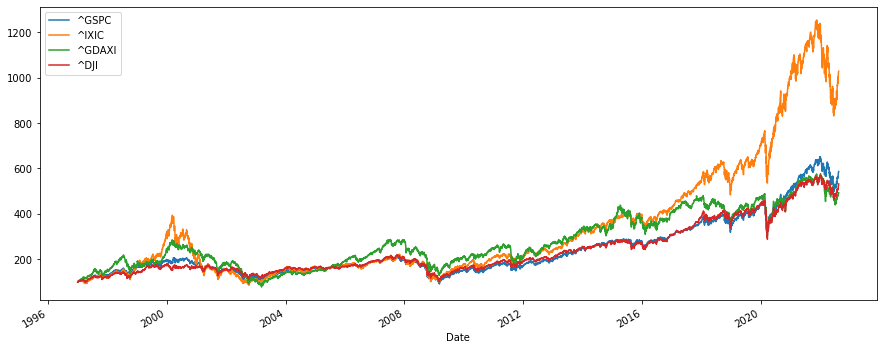

In [42]:
(ind_data / ind_data.iloc[0] * 100).plot(figsize=(15,6));
plt.show

In [43]:
ind_returns = (ind_data / ind_data.shift(1)) - 1
ind_returns.tail()

,^GSPC,^IXIC,^GDAXI,^DJI
Date,,,,
2022-08-10,0.021291,0.028884,0.012262,0.016327
2022-08-11,-0.000705,-0.005826,-0.000469,0.000815
2022-08-12,0.017322,0.020914,0.007400,0.012730
2022-08-15,0.003970,0.006197,0.001505,0.004484
2022-08-16,0.006011,0.003002,0.006768,0.010538


In [44]:
annual_ind_returns = ind_returns.mean() * 250
annual_ind_returns

^GSPC     0.087814
^IXIC     0.122043
^GDAXI    0.074606
^DJI      0.082434
dtype: float64

In [45]:
tickers = ['PG', '^GSPC', '^DJI']

data_2 = pd.DataFrame()

for t in tickers:
    data_2[t] = wb.DataReader(t, data_source='yahoo', start='2007-1-1')['Adj Close']

In [46]:
data_2.tail()

,PG,^GSPC,^DJI
Date,,,
2022-08-10,146.300003,4210.240234,33309.511719
2022-08-11,145.259995,4207.270020,33336.671875
2022-08-12,146.669998,4280.149902,33761.050781
2022-08-15,148.559998,4297.140137,33912.441406
2022-08-16,150.279999,4322.970215,34269.941406


<function matplotlib.pyplot.show(close=None, block=None)>

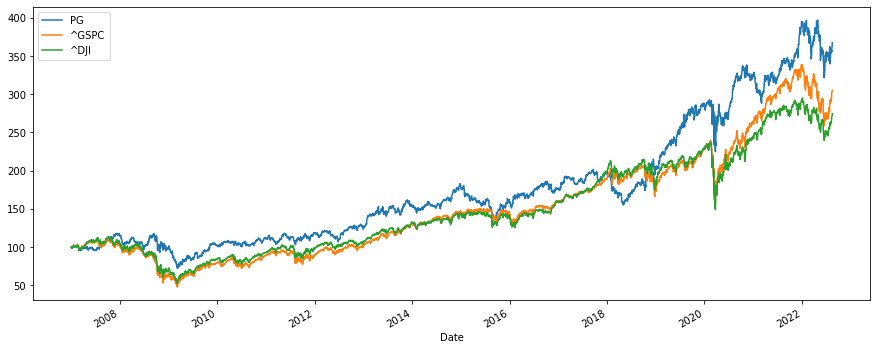

In [47]:
(data_2 / data_2.iloc[0]*100).plot(figsize=(15,6));
plt.show